In [54]:
using DynamicPolynomials
using Images
@polyvar x
@polyvar y
;


-0.11337925226948897x⁴ + 0.26281575058294093x³ + 0.10463070865692115x² + 0.2676894038121995x - 0.2552729950143675

([-0.048862346759727115, -0.20558298628382565, -0.2728997624023711, -0.2746366253383767, -0.2346175253148556, -0.17666641255482118, -0.1246072372812867, -0.10226394971726543, -0.13346050008577062, -0.24202083860981569, -0.4517689155124136], [-0.2034749528348938, -0.1155068798787228, -0.0711770562664146, -0.06492265610950873, -0.09118085351954466, -0.14438882260806185, -0.21898373748659974, -0.30940277226669777, -0.4100831010598954, -0.5154618979777322, -0.6199763371317475])

In [157]:
function xy2hv(ix, iy)
    global fx, fy
    
    nx = fx(x=>iy*sin(ix)) - ix
    ny = fy(y=>iy/cos(0.5ix)) - iy
    
    (atan(ny, nx) + pi) / 2pi, sqrt(nx^2 + ny^2)
end

    

xy2hv (generic function with 1 method)

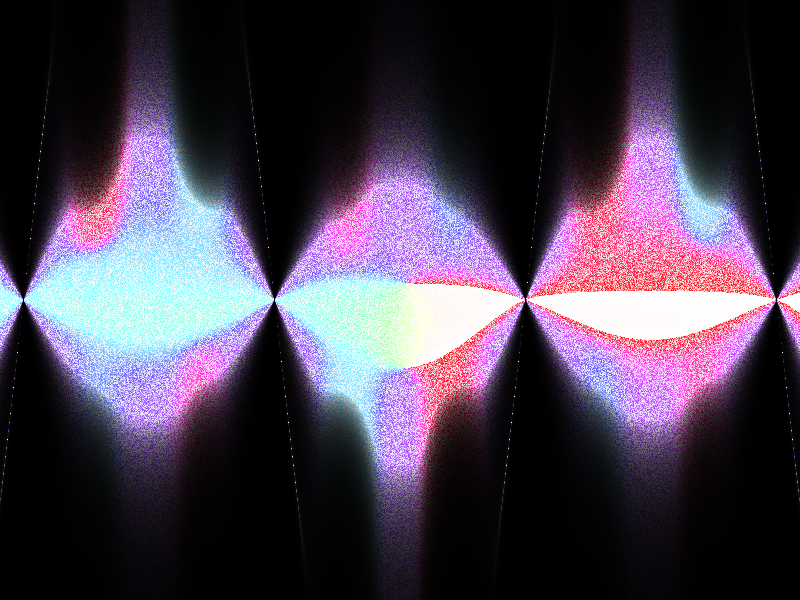

In [161]:

a = -0.5 .+ rand(6)
fy = a[1]*y^3 + a[2]*y^2 + a[3]*y + a[4] + a[5] * y^4 + a[6] * y^5
a = -0.5 .+ rand(6)
fx = a[1]*x^3 + a[2]*x^2 + a[3]*x + a[4] + a[5] * x^4 + a[6] * x^5


w = 800
h = 600
pixels = zeros(HSV, h, w)


xmax = 10
ymax = 10
xmin = -10
ymin = -10

xrange = xmax-xmin
yrange = ymax-ymin

function px2x(px) 
    x =  (px-1) / (w-1) # 0 to 1
    x *= xrange # 0 to xrange
    x += xmin # xmin to xmax
end

function py2y(py) 
    y =  (py-1) / (h-1) # 0 to 1
    y *= yrange # 0 to yrange
    y += ymin # ymin to ymax
end
    

for px in 1:w, py in 1:h
    
    hue, value = xy2hv(px2x(px), py2y(py))

    
    pixels[py,px] = HSV(360hue, hue*rand(), 100/value)
    
end

pixels

In [100]:
px2x(800)

60.0